In [1]:
!pip install spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy

In [2]:
musk = pd.read_csv('Elon_musk.csv')
musk

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
musk.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [5]:
musk.corr()

,Unnamed: 0
Unnamed: 0,1.0


In [6]:
musk.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [7]:
!pip install wordcloud

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train,test = train_test_split(musk,test_size=0.1)

In [10]:
train

,Unnamed: 0,Text
189,190,@Megaconstellati @Aviation_Intel @jetcitystar ...
871,872,@SpacePadreIsle Great shot!
452,453,@SpaceX Standing down for today to inspect roc...
1001,1002,@jwangARK Tesla FSD computer�s dual SoCs funct...
197,198,Under Vegas in @boringcompany tunnel yesterday...
...,...,...
153,154,The esthetics of Cyberpunk are incredible btw....
1650,1651,RT @NASASpaceflight: LAUNCH! Starship SN5 has ...
1446,1447,Lengthy background on Neuralink by @waitbutwhy...
186,187,"@naval [Some tyranny]. Also, the road to hell ..."


In [11]:
test

,Unnamed: 0,Text
1695,1696,RT @NASA: They're coming home! <U+0001F30E><U+...
700,701,RT @SpaceX: All systems are go for tonight�s l...
1011,1012,@MariaBartiromo @POTUS @realDonaldTrump @JeffB...
1797,1798,@RandyVegetables Some of whom seriously think ...
931,932,"@Rubix161 I mean, ya gotta have a tiki bar �"
...,...,...
1932,1933,@PPathole @BBCScienceNews This thing we call �...
1454,1455,@universal_sci Perhaps one day there will be a...
1144,1145,@EvaFoxU !!
1124,1125,@William_M_Brown @RationalEtienne @PPathole @t...


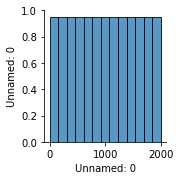

In [12]:
sns.pairplot(musk)

In [13]:
import re

In [24]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) 
    text = re.sub(r"#", "", text)
    text = re.sub(r"RT[\s]+", "", text)
    text = re.sub(r"https?:\/\/\S+", "", text)
    return text

In [38]:
musk["Text"] = musk["Text"].apply(cleantext)

In [39]:
musk

,Unnamed: 0,Text,subjectivity,polarity
0,1,I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [40]:
from textblob import TextBlob

In [52]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [60]:
musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk

,Unnamed: 0,Text,subjectivity,polarity
0,1,I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

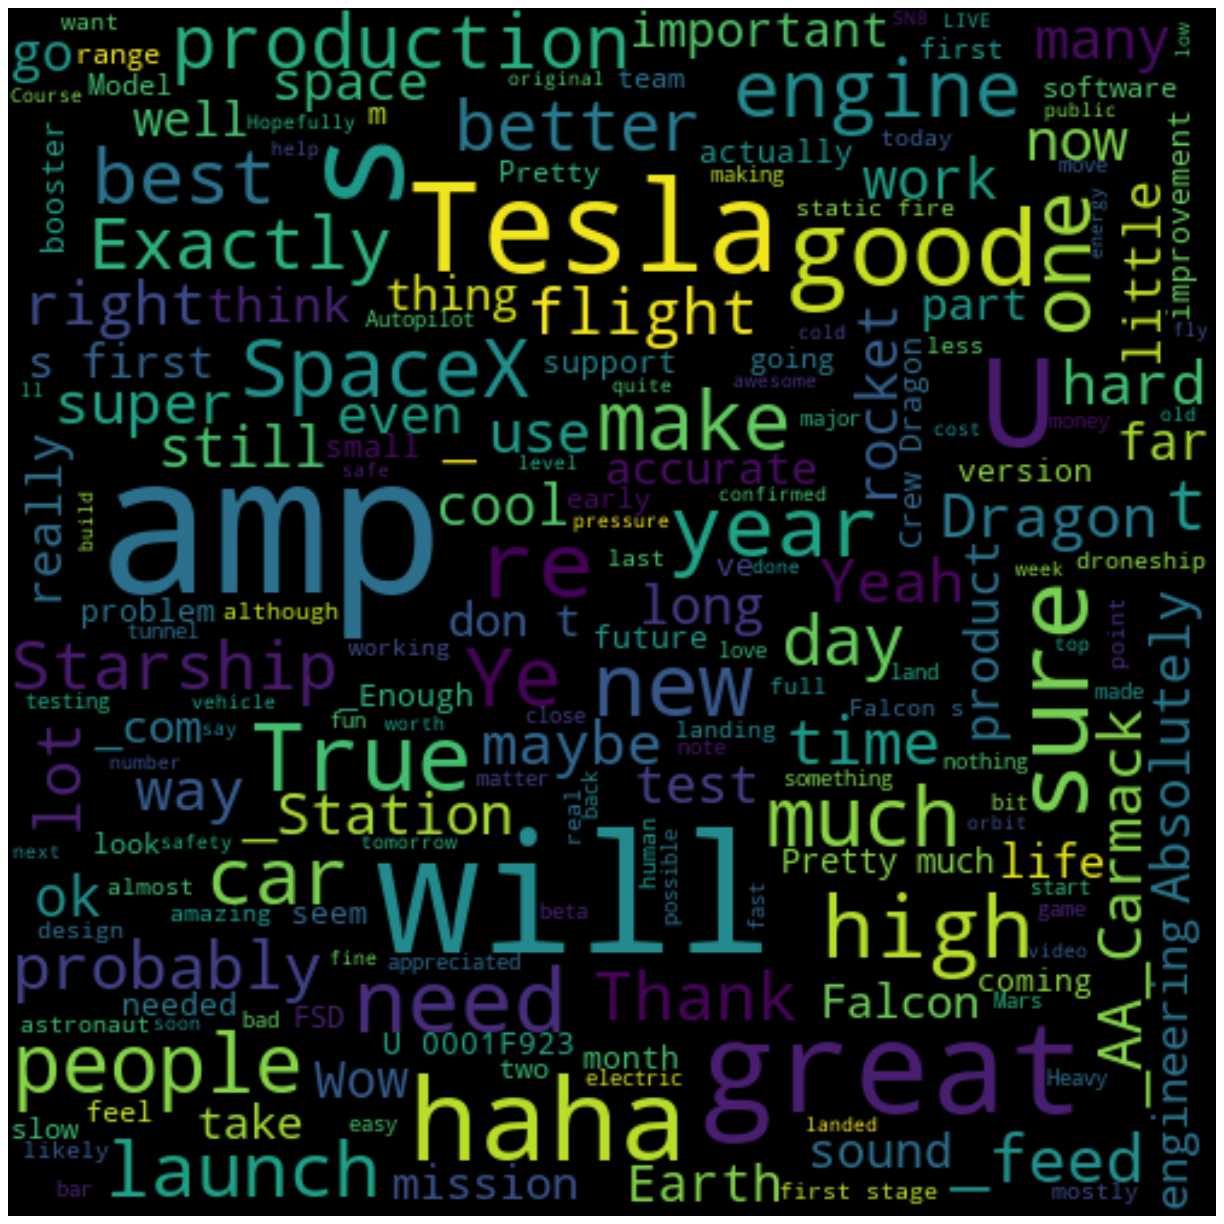

In [176]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in musk["Text"]])
wordCloud = WordCloud(width = 500, height = 500, random_state = 50, max_font_size = 80).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [181]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


In [184]:
musk["analysis"] = musk["polarity"].apply(analysis)
musk

KeyError: 'polarity'

In [189]:
positive_tweets = musk[musk['analysis'] == 'Positive']
negative_tweets = musk[musk['analysis'] == 'Negative']

In [195]:
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])


positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - I�m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don� 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or� 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That�s what you�re missing.


In [196]:
musk = musk[['Text','analysis']]
musk

,Text,analysis
0,I�m an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [199]:
musk = musk [musk ['analysis']!= 'Neutral']
musk

,Text,analysis
0,I�m an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [200]:
musk.shape

(1100, 2)

In [201]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1100 non-null   object
 1   analysis  1100 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [202]:
musk.describe()

,Text,analysis
count,1100,1100
unique,1048,2
top,True,Positive
freq,6,885


In [206]:
train,test = train_test_split(musk,test_size=0.1)

In [207]:
train

,Text,analysis
223,Battery cell production is the fundamental rat...,Positive
1941,Exactly,Positive
1131,Great letter! It will be increasingl�,Positive
1347,This is a test engine. Flight articles are f...,Positive
1082,Great photo!,Positive
...,...,...
1156,True,Positive
13,It�s getting real,Positive
1058,_avoigt _zimon Had the most amazing kebab ev...,Positive
1273,There are some eerie parallels between The Bo...,Negative


In [208]:
test

,Text,analysis
1637,Apart from failing to quarantine elderly/at-...,Positive
1109,"Call of Booty, great game",Positive
360,All Tesla cars delivered in the final three da...,Positive
1508,Payload reduction due to reusability of boost...,Negative
1112,Unexpected pressure rise in the turbomachine...,Positive
...,...,...
318,How strange,Negative
1894,Good article. I�,Positive
568,This is a subject of much debate,Positive
275,Much more than this &amp; increasing rapidly,Positive


In [211]:
for val in train['Text']:
    print (val)

Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important pr� 
   Exactly
     Great letter! It will be increasingl� 
  This is a test engine. Flight articles are fixed with no gimbal.
    Great photo!
 Yes, the flaps are now directly driven by electric motors with a gearbox! No more hydraulics.
 Good point
   Most likely, all flaps will fold after landing to reduce wind tip over force. T� 
  Maybe I can be helpful. Had Mobi-C disc put in at C5-C6, however 1st surgery failed to remov� 
 _sci This might sting a little �
_ Absolutely
  Very real possibility
 Sounds about right
 Summarizes pretty much every biz school case study
With Cyberpunk, even the hotfixes literally have hotfixes, but � great game
  Absolutely
: �We are going to go to the moon, we are going to have a base on the moon, we are going to send people to mars and make�
  Sure, but which planet?
_   Haha thanks :)
    Mass ratio. Liquid oxygen is much denser than liqui

_Alarms Just go through resonant modes fast. It�s when you hang out there that problems arise.
 That number sure comes up a lot <U+0001F923><U+0001F923>
 I want to do electric vtol supersonic sooo bad, but my brain will overload
  We need high Brinell hardness &amp; high corrosion resistance. Because of Cybertruck�s faceted� 
: <U+0001F409> Enter the Crew Dragon. At 4:48 p.m. EST (9:48 p.m. UTC), the NASA  Crew-1 astronauts give you a LIVE tour of their space�
_e_morgan Sure is
 Weld esthetics will improve greatly in upcoming Starships
 _aw _  The government has the most money by far. They talk in trillions.
 Suicide is more than double homicide 
 Vera Rubin Observatory is cool
  Sorry, sir I think I have momentinertiaphobia
 A lot of people are going to be super unhappy with West Coast high tech as the de facto arbiter of free speech
 Yeah, would have been way better just to send everyone $6k
 _Livio Both obv insanely great, too bad they had this pointless argument
Important note abou

 Pretty accurate. It�s not so much DNA sequencing as it is using synthetic DNA/RNA to fix bugs in our code� 
 We do expect to make heavy use of LFP for medium range cars &amp; stationary storage
 Tesla Germany designed &amp; built the vaccine RNA printers for CureVac, but, subject to some CureVac IP, th� 
 Black-Scholes formula is kinda bs. Big difference between a finance approximation &amp; fundamental physics / pure math.
 No easy way to answer this in a tweet, but helping with dire brain injuries is our first priority. Details Aug 28.
: Onboard camera view of Falcon 9�s SAOCOM 1B launch and first stage land landing 
  There are some practical size constraints too. Can�t be too big to fit in the engine comp� 
   Exactly. We barked up that tree for way too long (sigh). Gives a false sense of� 
_Enough Critical feedback is always appreciated btw
No need to be a gigachad to own
 More software improvements coming
: Falcon 9�s first stage has landed on the Of Course I Still Love You dron

In [215]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from scipy.stats import itemfreq

In [218]:
from nltk.stem import PorterStemmer

In [219]:
from nltk.stem import WordNetLemmatizer

In [223]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [226]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [145]:
train['Text'][1000]


KeyError: 1000

In [229]:
train_Text,train_analysis = Clean_Text(train)


In [233]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['battery cell production fundamental rate-limiter slowing sustainable energy future. important pr�',
  'exactly',
  'great letter! increasingl�',
  'test engine. flight article fixed gimbal.',
  'great photo!',
  'yes, flap directly driven electric motor gearbox! hydraulics.',
  'good point',
  'likely, flap fold landing reduce wind tip force. t�',
  'maybe helpful. mobi-c disc put c5-c6, however 1st surgery failed remov�',
  '_sci might sting little �',
  '_ absolutely',
  'real possibility',
  'sound right',
  'summarizes pretty much every biz school case study',
  'cyberpunk, even hotfixes literally hotfixes, � great game',
  'absolutely',
  ': �we going go moon, going base moon, going send people mar make�',
  'sure, planet?',
  '_ haha thanks :)',
  'mass ratio. liquid oxygen much denser liquid m�',
  'hate say it, might true',
  'true',
  'damn, that�s easy! spent quite bit time looking russian/ukrainian engines. they�re good.',
  '_com accurate distance calculation u

In [234]:
processed_data = pd.DataFrame(final_data)
processed_data

,tweets,sentiments
0,battery cell production fundamental rate-limit...,Positive
1,exactly,Positive
2,great letter! increasingl�,Positive
3,test engine. flight article fixed gimbal.,Positive
4,great photo!,Positive
...,...,...
985,true,Positive
986,it�s getting real,Positive
987,_avoigt _zimon amazing kebab ever outside tach...,Positive
988,eerie parallel boring company &amp; vault-tec....,Negative


In [239]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [240]:
processed_data

,tweets,sentiments
0,battery cell production fundamental rate-limit...,1
1,exactly,1
2,great letter! increasingl�,1
3,test engine. flight article fixed gimbal.,1
4,great photo!,1
...,...,...
985,true,1
986,it�s getting real,1
987,_avoigt _zimon amazing kebab ever outside tach...,1
988,eerie parallel boring company &amp; vault-tec....,0


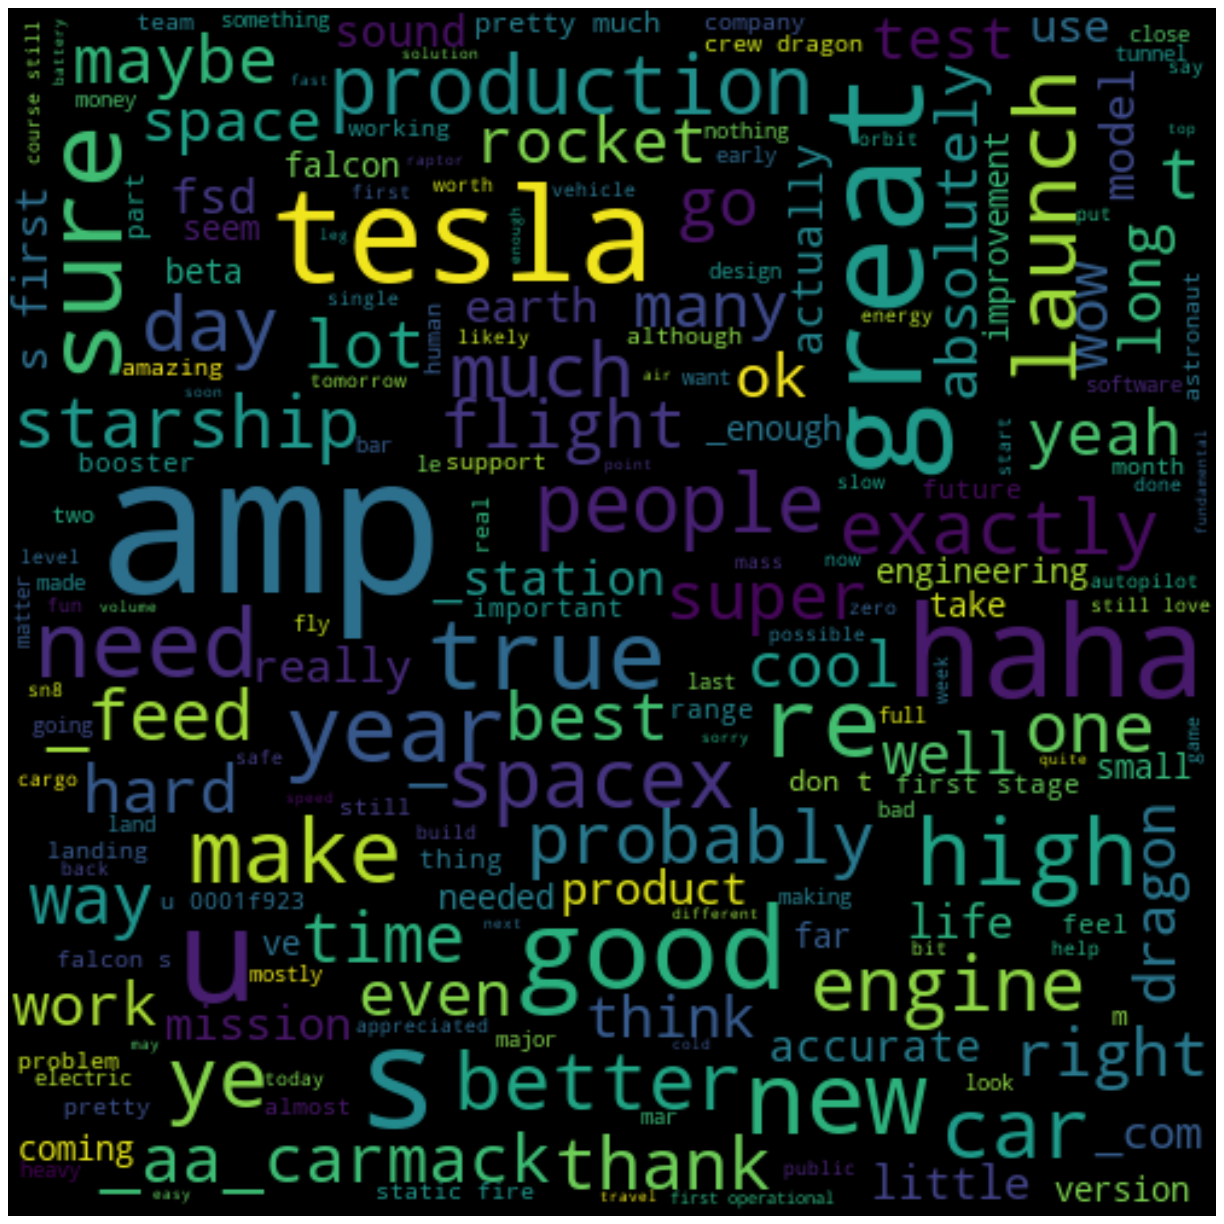

In [241]:
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 500, height = 500, random_state = 50, max_font_size = 80).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

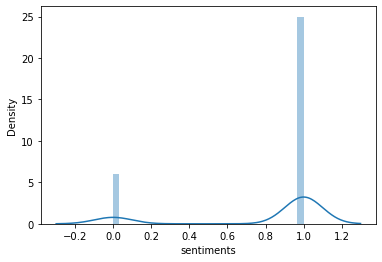

In [244]:
sns.distplot(processed_data['sentiments'])

C:\Users\Gpree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments'>

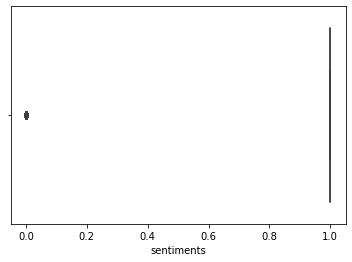

In [250]:
sns.boxplot(processed_data['sentiments'])

In [260]:
from sklearn.feature_extraction.text import CountVectorizer

In [267]:
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [271]:
X_train = cv.transform(processed_data['tweets'])

In [275]:
X_train

<990x13370 sparse matrix of type '<class 'numpy.int64'>'
	with 18012 stored elements in Compressed Sparse Row format>

In [276]:
X_train.shape

(990, 13370)

In [281]:
target = processed_data['sentiments'].values

In [282]:
target

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [284]:
target.shape

(990,)

In [285]:
from sklearn.naive_bayes import MultinomialNB

In [289]:
classifier = MultinomialNB()

In [292]:
classifier.fit(X_train,target)

MultinomialNB()

In [295]:
test_Text,test_analysis = Clean_Text(test)

In [307]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [308]:
final_test_data

,tweets,sentiments
0,apart failing quarantine elderly/at-risk peopl...,Positive
1,"call booty, great game",Positive
2,tesla car delivered final three day year get t...,Positive
3,payload reduction due reusability booster &amp...,Negative
4,unexpected pressure rise turbomachinery gas ge...,Positive
...,...,...
105,strange,Negative
106,good article. i�,Positive
107,subject much debate,Positive
108,much &amp; increasing rapidly,Positive


In [321]:
X_test = cv.transform(final_test_data['tweets'])
X_test

<110x13370 sparse matrix of type '<class 'numpy.int64'>'
	with 636 stored elements in Compressed Sparse Row format>

In [322]:
X_test.shape

(110, 13370)

In [328]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [329]:
y_pred.shape

(110,)

In [343]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [344]:
final_test_data

,tweets,sentiments
0,apart failing quarantine elderly/at-risk peopl...,1
1,"call booty, great game",1
2,tesla car delivered final three day year get t...,1
3,payload reduction due reusability booster &amp...,0
4,unexpected pressure rise turbomachinery gas ge...,1
...,...,...
105,strange,0
106,good article. i�,1
107,subject much debate,1
108,much &amp; increasing rapidly,1


In [356]:
actual_values = final_test_data['sentiments'].values
actual_values

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [358]:
actual_values.shape

(110,)

In [361]:
from sklearn.metrics import accuracy_score

In [362]:
accuracy_score(y_pred, actual_values)

0.8090909090909091